<a href="https://www.kaggle.com/code/notsau/customer-clustering?scriptVersionId=161459661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Marketteki Müşterileri Sınıflandırma

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#pembe hataları kaldırmak için
from sklearn.cluster import KMeans
#kmeans= en yakın komşu metodu
from sklearn.metrics import silhouette_score
#başarı oranını belirleten model
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
#bütün sütunları görmek için

In [2]:
df=pd.read_csv("/kaggle/input/customerr/PBL 5 recommendation data.csv",encoding="latin-1")

# EDA and Feature Engineering

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1322,1065,Reuben,James,NaN,1432131017,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04963,0.0,NaN
3397,2935,Arpad,Nagy,Company333,1458783559,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,"Large / Waist Size - 40""-56""",NaN,NaN,NaN,NaN,PF01517,0.0,NaN
3371,2908,Mike,David,NaN,1458588431,NaN,1.0,NaN,NaN,NaN,...,NaN,"15"" Long - Medium",NaN,NaN,NaN,NaN,NaN,Fei-113,3.0,NaN
439,396,Mary,Datoc,NaN,1414337958,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Large / Waist Size - 40""-56""",NaN,NaN,NaN,NaN,PF01518,0.0,NaN
2894,2464,Brenda,Norman,NaN,1455033527,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,236.50 ML,NaN,NaN,NaN,NaN,PF06549,0.0,NaN


In [5]:
df.shape

(4194, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4194 entries, 0 to 4193

Columns: 181 entries, Customers.id to Products.freight_cost

dtypes: float64(98), int64(10), object(73)

memory usage: 5.8+ MB


In [7]:
missing_values=df.isnull().sum()

In [8]:
columns_to_drop = missing_values[missing_values >= 300].index

In [9]:
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.columns.tolist()

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.create_date',
 'Customers.last_modified',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.order_number',
 'Orders.currency',
 'Orders.subtotal',
 'Orders.shipping',
 'Orders.total',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_amount',
 'Orders.status',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.customer_type',
 'Order_Items.id',
 'Order_Items.parent',
 'Order_Items.product_id',
 'Order_Items.product_name',
 'Order_Items.qty',
 'Order_Items.price',
 'Order_Items.cost',
 'Products.id',
 'Products.status',
 'Products.template',
 'Products.vendor',
 'Products.import_id',
 'Products.name',
 'Products.list_price',
 'Products.price',
 'Products.cost',
 'Products.last_modified',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_flags',
 'Products.amazon_item_type',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Pr

In [11]:
df["Orders.payment_date"]

0       1.426019e+09
1       1.386090e+09
2       1.449604e+09
3       1.386780e+09
4       1.386862e+09
5                NaN
6       1.410364e+09
7       1.388156e+09
8       1.389647e+09
9       1.390510e+09
10      1.395248e+09
11      1.390613e+09
12      1.390856e+09
13      1.390856e+09
14      1.424206e+09
15      1.391012e+09
16      1.391363e+09
17      1.395349e+09
18      1.391621e+09
19      1.391815e+09
20      1.391897e+09
21      1.401263e+09
22      1.401263e+09
23      1.420601e+09
24      1.392049e+09
25      1.392049e+09
26               NaN
27      1.392134e+09
28      1.394545e+09
29      1.396533e+09
30      1.399644e+09
31      1.401055e+09
32      1.402326e+09
33      1.404227e+09
34      1.395337e+09
35      1.395337e+09
36      1.395337e+09
37      1.392312e+09
38      1.392393e+09
39      1.392394e+09
40      1.392485e+09
41      1.393012e+09
42      1.393253e+09
43      1.393370e+09
44      1.393524e+09
45      1.393537e+09
46      1.393537e+09
47      1.393

In [12]:
df.isnull().sum()

Customers.id                       0
Customers.fname                    0
Customers.lname                    0
Customers.create_date              0
Customers.last_modified            0
Orders.id                          0
Orders.customer_id                 0
Orders.fname                       0
Orders.lname                       0
Orders.order_number                0
Orders.currency                    0
Orders.subtotal                    0
Orders.shipping                  195
Orders.total                       0
Orders.payment_status              5
Orders.payment_date               18
Orders.payment_amount             18
Orders.status                      0
Orders.placed_date                 0
Orders.updated_date               23
Orders.customer_type             183
Order_Items.id                     0
Order_Items.parent                 0
Order_Items.product_id            43
Order_Items.product_name           0
Order_Items.qty                    0
Order_Items.price                  0
O

In [13]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,...,Products.google_shopping_type,Products.google_shopping_cat,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,...,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40,0.0
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,...,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50,NaN
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,...,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24,0.0
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,...,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,10.60,7.80,18.50,NaN
4,5,Abraham,Pollak,1386861599,1437764316,30,5,Abraham,Pollak,30,...,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,8.50,2.75,12.00,NaN


In [14]:
x = df[["Orders.customer_id","Customers.last_modified","Orders.subtotal","Orders.total","Orders.payment_date","Order_Items.price",
       "Products.price"]]

In [15]:
x.isnull().sum()

Orders.customer_id           0
Customers.last_modified      0
Orders.subtotal              0
Orders.total                 0
Orders.payment_date         18
Order_Items.price            0
Products.price             158
dtype: int64

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4194 entries, 0 to 4193

Data columns (total 7 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   Orders.customer_id       4194 non-null   int64  

 1   Customers.last_modified  4194 non-null   int64  

 2   Orders.subtotal          4194 non-null   float64

 3   Orders.total             4194 non-null   float64

 4   Orders.payment_date      4176 non-null   float64

 5   Order_Items.price        4194 non-null   float64

 6   Products.price           4036 non-null   float64

dtypes: float64(5), int64(2)

memory usage: 229.5 KB


In [17]:
x["Orders.payment_date"].fillna(x["Orders.payment_date"].mode().iloc[0], inplace=True)

In [18]:
x["Products.price"].fillna(x["Products.price"].mode().iloc[0], inplace=True)

In [19]:
#x=pd.get_dummies(x,drop_first=True)

In [20]:
x.head()

,Orders.customer_id,Customers.last_modified,Orders.subtotal,Orders.total,Orders.payment_date,Order_Items.price,Products.price
0,797,1437764306,57.20,64.29,1.426019e+09,57.20,57.64
1,3,1437764354,20.00,29.99,1.386090e+09,5.00,10.29
2,3,1437764354,68.78,78.73,1.449604e+09,68.78,68.78
3,4,1437762646,19.56,29.55,1.386780e+09,19.56,19.56
4,5,1437764316,36.05,46.00,1.386862e+09,36.05,36.05


# Modelling

In [21]:
model=KMeans(4)
#kmeans'ı kullanarak modeli 4 gruba ayırmak istiyoruz

In [22]:
model=model.fit(x)
#sadece x'le modeli eğitiyoruz

In [23]:
tahmin=model.predict(x)
#arabayı benzerliklerine göre 4 farklı sütuna ayırdı (tahmin etti)

In [29]:
x["Cluster"]=tahmin
#x'e yeni bi sütun açıp tahmin ettiğimiz verileri sütuna ekledik

In [24]:
wcss=[]
for i in range(1,10):
#2den başlayıp 10 gruba kadar ayırtcaz ve hangi gruplamanın uygun olduğuna bakacağız (neden 2?; çünkü 1 grup anlamsız)
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

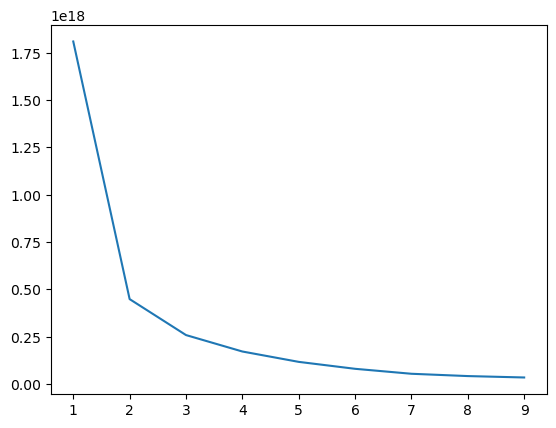

In [30]:
plt.plot(range(1,10),wcss)
#dirsek grafiğini çizdik
#3'te kırılmış gibi gözüküyor

In [33]:
from yellowbrick.cluster import KElbowVisualizer

In [34]:
km=KMeans()

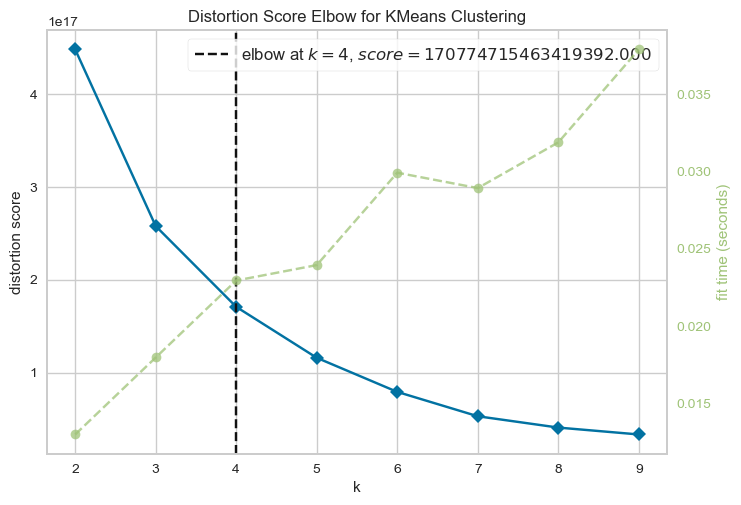

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
#yukarda 3 grup sanki dirsekdeymiş gibi gözüküyodu ama burda 4 olduğunu gördük

In [37]:
x.head()

,Orders.customer_id,Customers.last_modified,Orders.subtotal,Orders.total,Orders.payment_date,Order_Items.price,Products.price,Cluster
0,797,1437764306,57.20,64.29,1.426019e+09,57.20,57.64,2
1,3,1437764354,20.00,29.99,1.386090e+09,5.00,10.29,1
2,3,1437764354,68.78,78.73,1.449604e+09,68.78,68.78,2
3,4,1437762646,19.56,29.55,1.386780e+09,19.56,19.56,1
4,5,1437764316,36.05,46.00,1.386862e+09,36.05,36.05,1
